<a href="https://colab.research.google.com/github/gmehra123/course1/blob/master/Unsupervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

* Supervised vs Unsupervised Learning
  *  Supervised is guided by labels. eg Classifying tumors.
  *  Unsupervised learning is pure pattern discovery unguided by labels of any kind
* A dataset with 5 columns or features has data points that exist in a 5 Dimensional space.




### Simple application to Iris Dataset

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
model=KMeans(n_clusters=3)

In [ ]:
iris=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None)

In [ ]:
iris.columns=['Ptl_length','Ptl_wdth','sepal_length','sepal_wdth','label']

In [ ]:
X=iris.loc[:,['Ptl_length','Ptl_wdth','sepal_length','sepal_wdth']].copy()

In [ ]:
model.fit(X)

KMeans(n_clusters=3)

In [ ]:
labels=model.predict(X)

In [ ]:
X['labels']=labels

In [ ]:
## Adding new samples
data={'Ptl_length':[6.4,4.5],'Ptl_wdth':[3.3,3.4],'sepal_length':[5.1,1.43],'sepal_wdth':[1.8,0.22]}
NSM=pd.DataFrame(data)

In [ ]:
New_labels=model.predict(NSM)

In [ ]:
NSM['Labels']=New_labels

In [ ]:
NSM

,Ptl_length,Ptl_wdth,sepal_length,sepal_wdth,Labels
0,6.4,3.3,5.10,1.80,0
1,4.5,3.4,1.43,0.22,1


In [ ]:
# Helps gives the model centroids
centers=model.cluster_centers_

In [ ]:
model.inertia_

78.940841426146

### Slightly more complicated clusrtering Workflow


In [ ]:
grains=pd.read_csv('https://raw.githubusercontent.com/gmehra123/course1/master/seeds.csv',header=None)

In [ ]:
grains.columns=['Area','Perimeter','Comapctness','len_kernel','wid_kernel','asymmetry','len_kernel_groove','category']
X=grains.loc[:,['Area','Perimeter','Comapctness','len_kernel','wid_kernel','asymmetry','len_kernel_groove']].copy()

In [ ]:
ks=range(1,6)
inertia=[]
for k in ks:
  model=KMeans(n_clusters=k)
  model.fit_predict(X)
  inertia.append(model.inertia_)

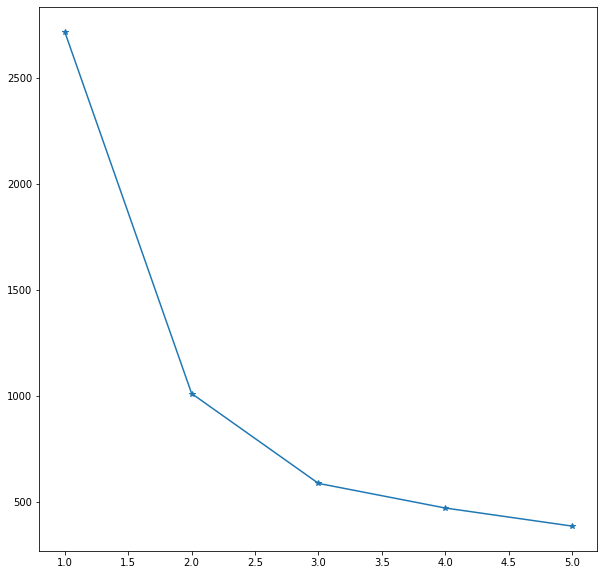

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(ks,inertia,marker='*')

* In this case looks like 3 gives the best fit for clustering.
* After 3 the inertia decreases slowly

In [ ]:
model=KMeans(n_clusters=3)
labels=model.fit_predict(X)
grains['clusters']=labels

In [ ]:
pd.crosstab(grains['clusters'],grains['category'])

category,1,2,3
clusters,,,
0,60,10,2
1,1,60,0
2,9,0,68


### Feature engineering
* Features can have widely different scales and features
* If you have 1 feature on the scale of thousands and another on the scale of 100s then the clustering will naturally weight the feature on the scale of thousands (K) more heavily.
* It is necessary to standardize features to avoid this scaling issue
* You can use StandardScaler to scale the features of the dataset
* *Note* Use normalizer if normalizing rows and StandardScaler if normalizing columns

In [ ]:
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline

In [ ]:
mvmnt=pd.read_csv('https://assets.datacamp.com/production/repositories/655/datasets/1304e66b1f9799e1a5eac046ef75cf57bb1dd630/company-stock-movements-2010-2015-incl.csv')

In [ ]:
scaler=Normalizer()
n=mvmnt.drop(columns='Unnamed: 0')
X=scaler.fit_transform(n)

In [ ]:
ks=range(1,15)
inertia=[]
for k in ks:
  model=KMeans(n_clusters=k)
  model.fit(X)
  inertia.append(model.inertia_)


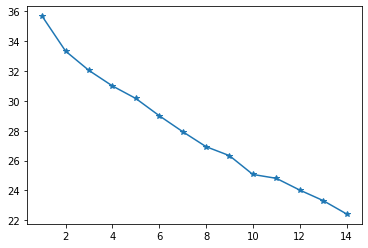

In [ ]:
plt.plot(ks,inertia,marker='*')

In [ ]:
kmeans=KMeans(n_clusters=10)
scaler=Normalizer()
pipeline=make_pipeline(scaler,kmeans)
pipeline.fit(n)
labels=pipeline.predict(n)

In [ ]:
labels

array([1, 6, 3, 6, 8, 6, 2, 3, 9, 5, 9, 3, 9, 0, 0, 3, 6, 1, 6, 2, 0, 3,
       3, 0, 0, 5, 6, 5, 4, 8, 0, 4, 0, 0, 3, 9, 8, 2, 4, 2, 5, 7, 2, 2,
       9, 3, 2, 0, 3, 2, 0, 0, 2, 9, 2, 6, 5, 9, 3, 0], dtype=int32)

In [ ]:
mvmnt['clusters']=labels

In [ ]:
results=mvmnt.loc[:,['clusters','Unnamed: 0']].copy()

In [ ]:
results.sort_values(by='clusters')

,clusters,Unnamed: 0
59,0,Yahoo
51,0,Texas instruments
50,0,Taiwan Semiconductor Manufacturing
47,0,Symantec
33,0,Microsoft
32,0,3M
30,0,MasterCard
24,0,Intel
23,0,IBM
20,0,Home Depot


## Hierachical Clustering
* Real life examples of hierachical clustering include individual animals grouped into species, species into phyla and finally into animals
* Hierachical clustering can organize data samples into related groups, with groups at the top of the hierachy being the most aggregated.
* Dendrograms are a way to visualize hierachical clustering. Clusters are vertical lines and horizontal lines indicate mergers
* Height on a dendrogram measures the distance between the merging clusters
* First example we use hierachical clustering to visualize data

In [ ]:
scores=pd.read_csv('https://assets.datacamp.com/production/repositories/655/datasets/2a1f3ab7bcc76eef1b8e1eb29afbd54c4ebf86f2/eurovision-2016.csv')

In [ ]:
scores.head()

,From country,To country,Jury A,Jury B,Jury C,Jury D,Jury E,Jury Rank,Televote Rank,Jury Points,Televote Points
0,Albania,Belgium,20,16,24,22,24,25,14,NaN,NaN
1,Albania,Czech Republic,21,15,25,23,16,22,22,NaN,NaN
2,Albania,The Netherlands,22,14,23,24,21,24,24,NaN,NaN
3,Albania,Azerbaijan,19,12,11,21,11,13,19,NaN,NaN
4,Albania,Hungary,8,13,9,14,9,10,10,1.0,1.0


In [ ]:
from scipy.cluster.hierarchy import linkage,dendrogram

In [ ]:
grains=pd.read_csv('https://raw.githubusercontent.com/gmehra123/course1/master/seeds.csv',header=None)
grains.columns=['Area','Perimeter','Comapctness','len_kernel','wid_kernel','asymmetry','len_kernel_groove','category']

In [ ]:
X=grains.loc[:,['Area','Perimeter','Comapctness','len_kernel','wid_kernel','asymmetry','len_kernel_groove']].copy()

In [ ]:
category=grains.category.to_list()

In [ ]:
mergings=linkage(X,method='complete')

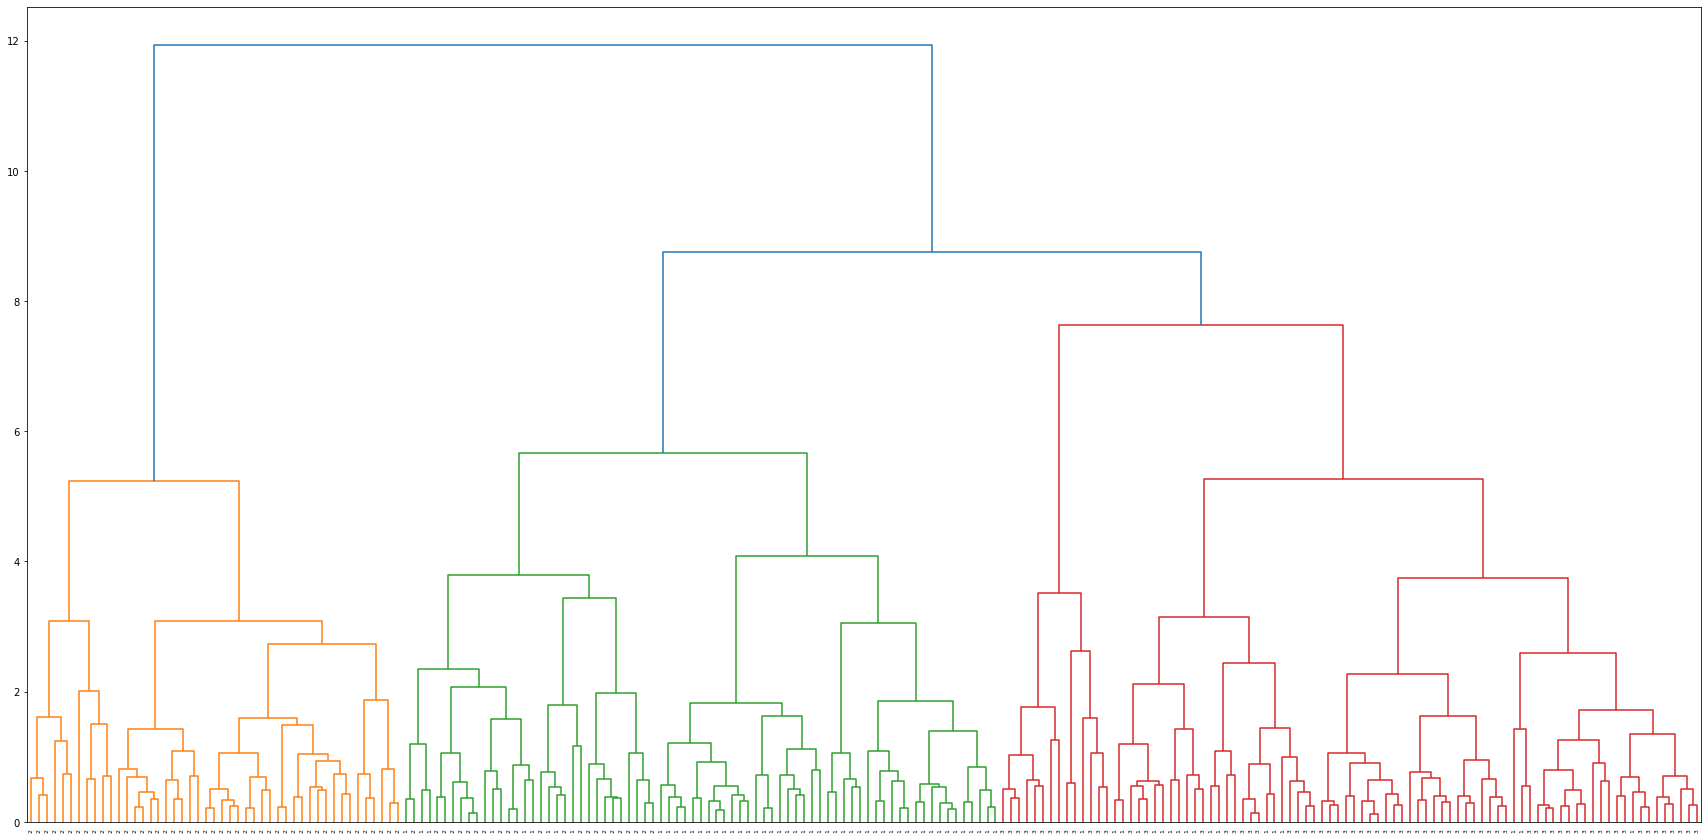

In [ ]:
plt.figure(figsize=(30,15))
dendrogram(mergings,labels=category,leaf_rotation=90,leaf_font_size=6)
plt.show()

In [ ]:
from scipy.cluster.hierarchy import fcluster
inter=fcluster(mergings,6,criterion='distance')

In [ ]:
grains['labels']=inter

In [ ]:
grains.groupby('labels')[['Area','Perimeter','len_kernel']].mean()

,Area,Perimeter,len_kernel
labels,,,
1,19.172553,16.476596,6.273319
2,15.397067,14.821200,5.690733
3,12.182857,13.382857,5.281929
4,12.047703,13.298649,5.221541


### t-SNE for unsupervised learning
* Takes samples from a high dimensional space into a 2 or 3 D space so that visualization is easy
* Great for understanding or visualizing datasets.
* t-SNE has a argument called learning rate. you have to set learning rate to a few different values to get the best fit

In [ ]:
grains=pd.read_csv('https://raw.githubusercontent.com/gmehra123/course1/master/seeds.csv',header=None)
grains.columns=['Area','Perimeter','Comapctness','len_kernel','wid_kernel','asymmetry','len_kernel_groove','category']

In [ ]:
grains.sample(5)

,Area,Perimeter,Comapctness,len_kernel,wid_kernel,asymmetry,len_kernel_groove,category
155,11.19,13.05,0.8253,5.250,2.675,5.813,5.219,3
106,18.85,16.17,0.9056,6.152,3.806,2.843,6.200,2
150,11.83,13.23,0.8496,5.263,2.840,5.195,5.307,3
100,16.41,15.25,0.8866,5.718,3.525,4.217,5.618,2
143,12.22,13.32,0.8652,5.224,2.967,5.469,5.221,3


In [ ]:
from sklearn.manifold import TSNE

In [ ]:
model=TSNE(learning_rate=200)

In [ ]:
tsne_features=model.fit_transform(grains)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


In [ ]:
xs=tsne_features[:,0]
ys=tsne_features[:,1]

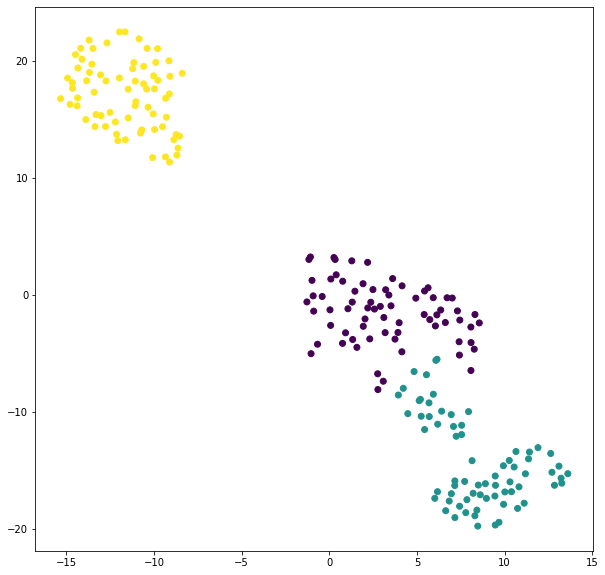

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(xs,ys,c=category)

### Principal Component Analysis
* PCA is a technique for dimension reduction.
* High feature/dimension datasets can be reduced to lower dimensions using multiple techniques including PCA
* PCA creates a dataset which is efficient for storage and computation
* PCA also helps by removing noise features
* First step of PCA is decorrelating the date. There is no dimension reduction at this stage. 
* The second step is dimension reduction
* PCA first rotates datasamples to be aligned with the axes
* PCA then shifts data samples to have mean 0
* Intrinsic dimension of a datset is the minimum number of dimensions that can be used to describe the dataset
* Intrinsic dimension can be identified by counting the number of PCA features that have high variance

In [28]:
fish=pd.read_csv('https://assets.datacamp.com/production/repositories/655/datasets/fee715f8cf2e7aad9308462fea5a26b791eb96c4/fish.csv',header=None)

In [29]:
features=fish.loc[:,1:6].copy()

In [30]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [31]:
scaler=StandardScaler()
pca=PCA()
pipeline=make_pipeline(scaler,pca)

In [32]:
pipeline.fit(features)

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA())])

<BarContainer object of 6 artists>

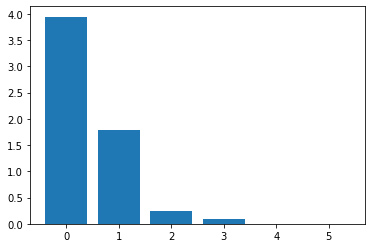

In [33]:
feat=range(pca.n_components_)
plt.bar(feat,pca.explained_variance_)

* In this case looks like the intrinsic dimension of the datset is 2

In [34]:
pca.components_[0,:]

array([0.48243624, 0.49662162, 0.49890721, 0.50341821, 0.12792513,
       0.04380754])

In [37]:
scaler=StandardScaler()
pca=PCA(n_components=2)
pipeline=make_pipeline(scaler,pca)

In [38]:
pipeline.fit(features)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=2))])

In [43]:
pca.components_[0,:]

array([0.48243624, 0.49662162, 0.49890721, 0.50341821, 0.12792513,
       0.04380754])

In [40]:
transformed=pipeline.transform(features)

In [4]:
wiki=pd.read_csv('https://raw.githubusercontent.com/gmehra123/course1/master/wikipedia-vectors.csv',index_col=0)

In [9]:
from scipy.sparse import csr_matrix
articles=wiki.transpose()

In [11]:
arr=csr_matrix(articles)

In [13]:
titles=list(wiki.columns)

In [15]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans

In [23]:
svd=TruncatedSVD()
kmeans=KMeans(n_clusters=7)
pipeline=make_pipeline(svd,kmeans)

In [24]:
pipeline.fit(arr)

Pipeline(steps=[('truncatedsvd', TruncatedSVD()),
                ('kmeans', KMeans(n_clusters=7))])

In [25]:
labels=pipeline.predict(arr)

In [26]:
output=pd.DataFrame({'titles':titles,'labels':labels})

In [27]:
output.sort_values(by='labels')

,titles,labels
30,France national football team,0
36,2014 FIFA World Cup qualification,0
38,Neymar,0
35,Colombia national football team,0
40,Tonsillitis,1
41,Hepatitis B,1
42,Doxycycline,1
43,Leukemia,1
44,Gout,1
45,Hepatitis C,1
